# Приоритизация маркетинговых гипотез и анализ результатов проведенного A/B-теста

В данном исследовании проводится приоритизация маркетинговых гипотез и последующий анализ результатов проведенного A/B-теста крупного интернет-магазина.
Основные цели проекта:
- Приоритезация гипотез по увеличению выручки интернет-магазина с использованием фреймворков ICE и RICE - на основе файла hypothesis.csv с заявленными параметрами Reach, Impact, Confidence, Effort.
- Анализ результатов проведенного A/B-теста - на основе данных из файлов о заказах (orders.csv) и посетителях (visitors.csv).

# План работы:

<b>Часть 1 </b>

<b>Приоритизация гипотез:</b>
- Приоритизация маркетинговых гипотез с использованием фреймворка ICE;
- Приоритизация маркетинговых гипотез с использованием фреймворка RICE;
- Определение изенений приоритизации гипотез при применении RICE вместо ICE;
- Выводы.

<b>Входные данные</b>
- Файл /datasets/hypothesis.csv;
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<b> Часть 2 </b>
<b>Анализ A/B-теста</b>
- График кумулятивной выручки по группам. Выводы и предположения.
- График кумулятивного среднего чека по группам. Выводы и предположения.
- График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
- График кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения.
- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения.
- График количества заказов по пользователям. Выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
- График стоимостей заказов. Выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
- Принятие решений по результатам теста и объяснить их.

<b>Входные данные</b>
- Файл /datasets/orders.csv.
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
- Файл /datasets/visitors.csv.
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## <b>Импорт библтотек и данных</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
from scipy import stats as st
from datetime import datetime, timedelta

pd.options.display.max_colwidth = 150
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
# Чтение файлов с данными и сохранение

try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

## <b>Предобработка данных</b>

In [3]:
display(hypothesis)
display(hypothesis.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

In [4]:
display(orders)
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [5]:
display(visitors)
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [6]:
# Корректировка названия колонок
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]
display(hypothesis.columns)
display(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [7]:
# Изменение типа данных для столбцов с датами
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [8]:
# Проверка на явные дубликаты
print ('Дубликаты orders:', orders.duplicated().sum())
print ('Дубликаты visitors:', visitors.duplicated().sum())

Дубликаты orders: 0
Дубликаты visitors: 0


In [9]:
# Проверка на наличие пропусков в таблицах
print ('Пропуски hypothesis:')
print(hypothesis.isna().sum())
print ('Пропуски visitors:')
print(visitors.isna().sum())
print ('Пропуски orders:')
print(orders.isna().sum())

Пропуски hypothesis:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
Пропуски visitors:
date        0
group       0
visitors    0
dtype: int64
Пропуски orders:
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


## <b>Приоритизация гипотез</b>

In [10]:
# ICE
pd.set_option('display.max_colwidth', None) # Сняли ограничение для визуала
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ice'] = hypothesis['ice'].round(2) # Округлили за ненадобностью

display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [11]:
# Аналогично для RICE
hypothesis['rice']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis['rice'] = hypothesis['rice'].round(2) # Округлили за ненадобностью
display (hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<b>Выводы этапа:</b>

- Согласно фреймворку ICE, топ приоритетных гипотез: 8,0,7,6.
- Согласно фреймворку RICE, топ приоритетных гипотез: 7,2,0,6.

Различия обусловлены тем, что при расчете RICE учитывается параметр охвата пользователей.

Гипотезы 0 и 7 попали в топ в обоих фреймворках. Данные гипотезы нужно взять в работу в первую очередь - они имеют потенциально высокий результат и охват.

## <b>Анализ A/B-теста</b>

In [12]:
#Проверка сбалансированности групп по числу покупателей

display(orders.query('group == "A"')['visitor_id'].nunique())
display(orders.query('group == "B"')['visitor_id'].nunique())
display((orders.query('group == "B"')['visitor_id'].nunique()-orders.query('group == "A"')['visitor_id'].nunique())/orders.query('group == "A"')['visitor_id'].nunique())

503

586

0.16500994035785288

Группы не сбалансированы

In [13]:
# Проверка на попадание в обе группы

duplicated_users = orders.groupby('visitor_id')['group'].nunique()
duplicated_users = duplicated_users[duplicated_users > 1]

display(f"Кол-во покупателей, попавших в обе группы: {len(duplicated_users)}")

'Кол-во покупателей, попавших в обе группы: 58'

In [14]:
# Зафиксировано 58 покупателя участвовавших в обоих группах теста.Удалим их во избежание искажений результатов
raw_orders = orders.query('visitor_id not in @duplicated_users.index')

In [15]:
print(orders['date'].min())
print(orders['date'].max())
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00


Даты теста с 1 по 31 августа 2019 года

In [16]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = raw_orders[['date','group']].drop_duplicates()
print(dates_groups['group'].unique())
dates_groups.head ()

['B' 'A']


,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [17]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = dates_groups.apply(
    lambda x: raw_orders[
        np.logical_and(
            raw_orders['date'] <= x['date'], raw_orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [18]:
# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [19]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

### <b>Построение графика кумулятивной выручки по группам</b>

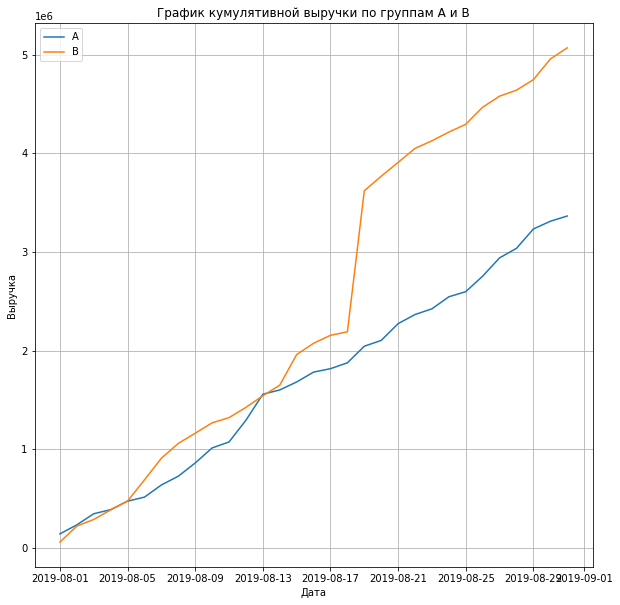

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid ('True')
plt.show()

<b>Вывод:</b>
- Выручка по группе А увеличивается равномерно без явных скачков.
- Выручка по группе B находится выше,а в районе 19 числа зафиксирована точка резкого роста (всплеск числа или дорогих заказов)

### <b>Построение графика кумулятивного среднего чека по группам</b>

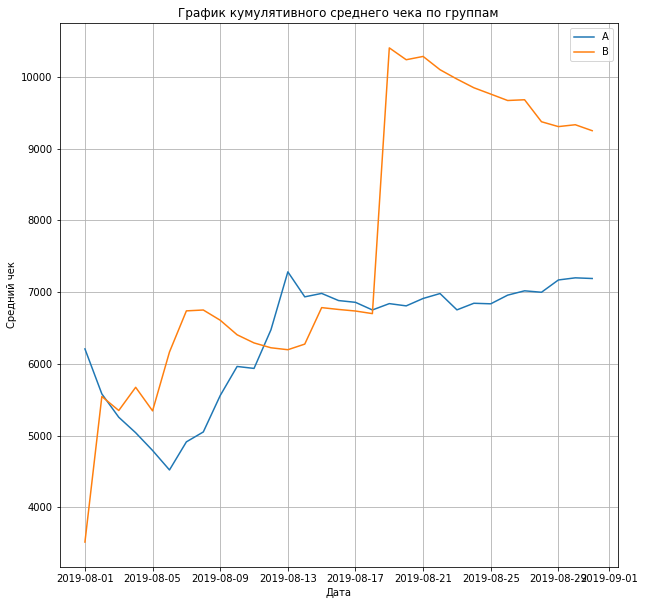

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid ('True')
plt.show()

<b>Вывод:</b>
- Средний чек по группе А сначала имеет нисходящий тренд, после 5-го числа виден быстрый рост начиная с 13-ого числа сильно не изменяется;
- Средний чек по группе В имеет ступенчатый вид с резкими ростами 1 и 17 числа, имеет лучшие результаты относительно группы А, начиная с 19 числа наблюдается нисходящий тренд

### <b> Построение графика относительного изменения кумулятивного среднего чека группы B к группе A</b>

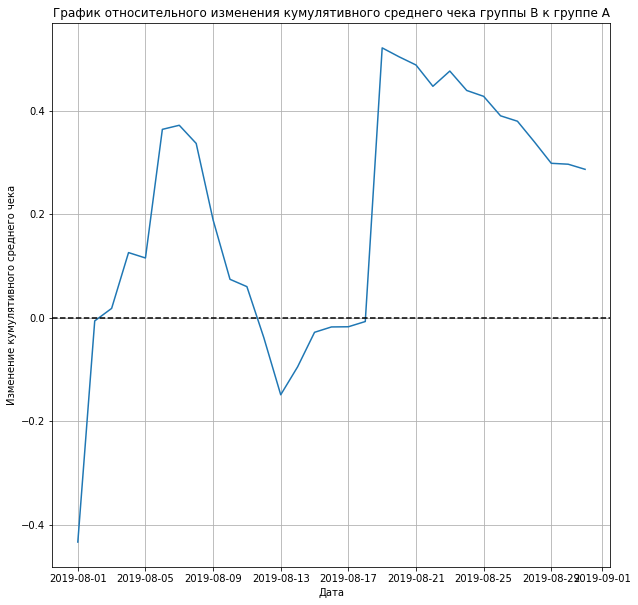

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего чека')
plt.grid ('True')
plt.show()

<b>Вывод:</b>
- Зафиксированы несколько областей резкого роста:в начале теста и всередине. Между ними - резкое падение.
- Вероятная причина - аномальные выбросы, крупные заказы.

### <b>Построение графика кумулятивного среднего количества заказов на посетителя по группам</b>

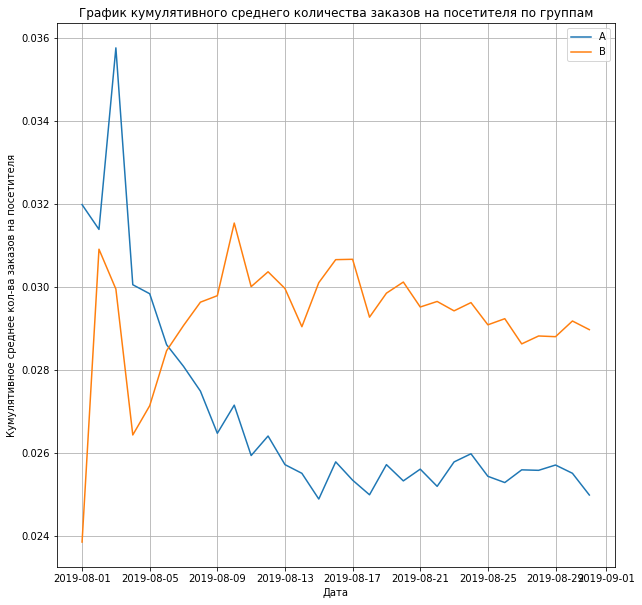

In [24]:
# считаем конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее кол-ва заказов на посетителя')
plt.grid ('True')
plt.show()

<b>Вывод:</b>
Группы колебались около одного значения на старте, затем среднее количества заказов на посетителя по групе B постепенно выровнялось и зафиксировалось выше значения группы А.

### <b>Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе А</b>

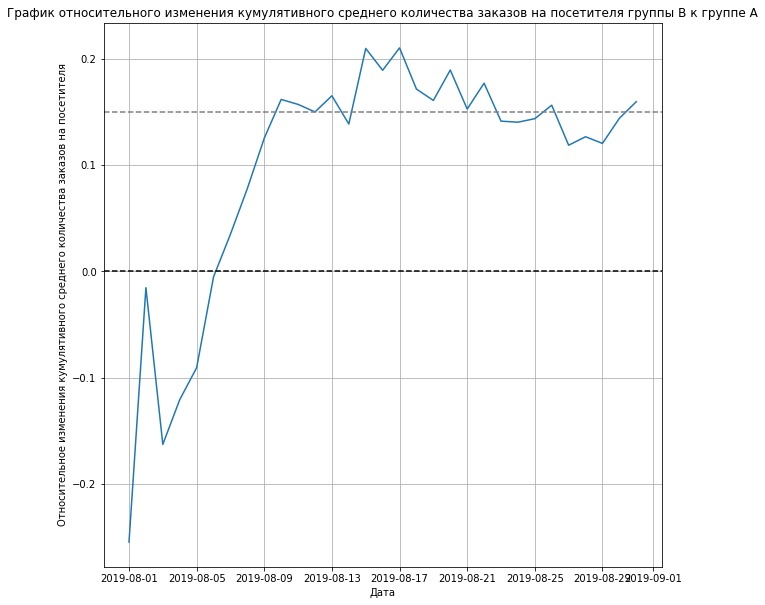

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост группы B к группе A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменения кумулятивного среднего количества заказов на посетителя')
plt.grid ('True')
plt.show()


<b>Вывод:</b>
- В начале теста группа B уступает группе A, затем уверенно вырывается вперёд и фиксируется около прироста в 15% относительно группы А

### <b>Построение skatter графика количества заказов по пользователям</b>

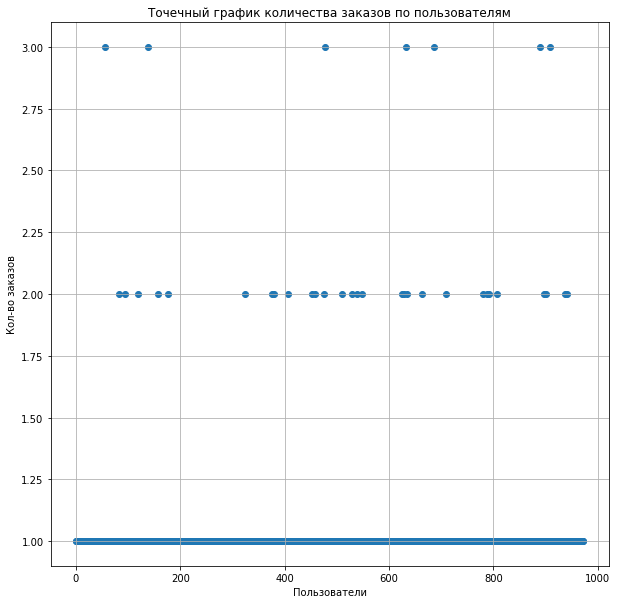

In [26]:
ordersbyusers = (
    raw_orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}))

ordersbyusers.columns = ['user_id', 'orders']

x_values = pd.Series(range(0, len(ordersbyusers)))
plt.scatter(x_values, ordersbyusers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.grid ('True')
plt.show()

<b>Вывод:</b>
- Большинство покупателей заказывали только один раз

### <b>Расчет 95-го и 99-го перцентилей количества заказов на пользователя</b>

In [27]:
print (np.percentile(ordersbyusers['orders'], [95, 99])) 

[1. 2.]


<b>Вывод:</b>
- Не более 5% пользователей оформляли более 1 заказа, не более 1% - более 2 заказов. Следовательно, можно выбрать 2 заказа на одного пользователя за верхнюю границу

### <b>Построение skatter графика стоимостей заказов </b>

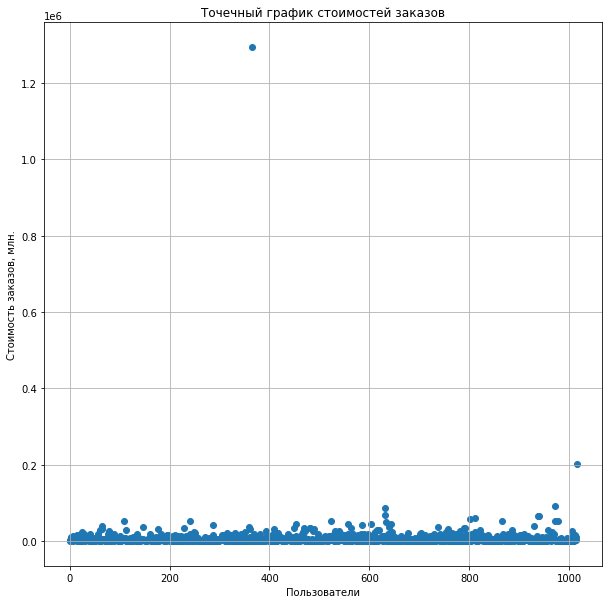

In [28]:
x_values = pd.Series(range(0, len(raw_orders['revenue'])))
plt.scatter(x_values, raw_orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов, млн.')
plt.grid ('True')

<b>Вывод:</b>
- Стоимость свыше 200 тыс. аномальна

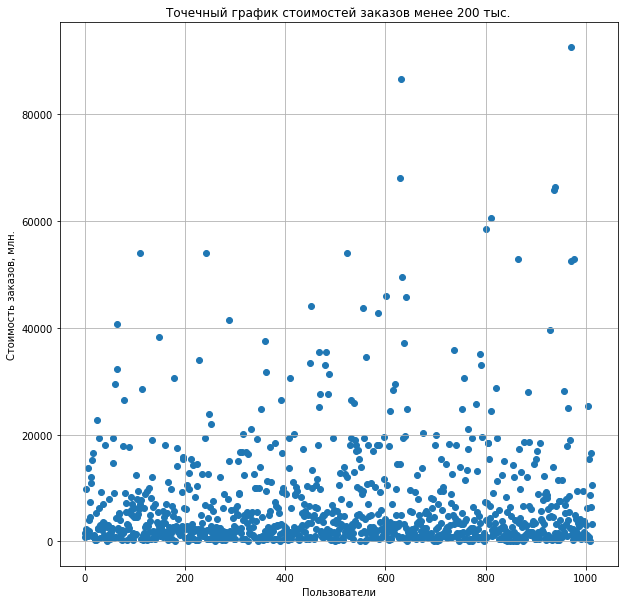

In [29]:
new_raw_orders= raw_orders[raw_orders['revenue'] < 200000]

x_values = pd.Series(range(0, len(new_raw_orders['revenue'])))
plt.scatter(x_values, new_raw_orders['revenue'])
plt.title('Точечный график стоимостей заказов менее 200 тыс.')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов, млн.')
plt.grid ('True')

### <b>Расчет 95-го и 99-го перцентилей стоимости заказов</b>

In [30]:
print(np.percentile(raw_orders['revenue'], [95, 99])) 

[26785. 53904.]


<b>Вывод:</b>
Не более 5% заказов имеют чек дороже 26785. Следовательно, можно выбрать это значение в каестве верхней границы.

### <b>Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным</b>

Для расчета статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным сформируем гипотезы:

- H0: Различий в среднем количестве заказов на посетителя между группами нет.

- H1: Различия в среднем количестве заказов на посетителя между группами есть.

Критический уровень значимости (альфа): 0,05.

Метод проверки гипотез: критерий Манна-Уитни.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    raw_orders[raw_orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    raw_orders[raw_orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [32]:
ordersByUsersA = (
    raw_orders[raw_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_Id', 'orders']

ordersByUsersB = (
    raw_orders[raw_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_Id', 'orders'] 

In [33]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value = {0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
if st.mannwhitneyu(sampleA, sampleB)[1] < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-value = 0.01102
Относительная разница: 0.160
Отвергаем нулевую гипотезу


Относительный прирост группы B к группе А равен 16%.

### <b>Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным</b>

Для расчета статистической значимости различий в среднем чеке заказа между группами по «сырым» данным сформируем гипотезы:

 - H0: Различий в среднем чеке между группами нет.

 - H1: Различия в среднем чеке между группами есть.

Критический уровень значимости (альфа): 0,05.

Метод проверки гипотез: критерий Манна-Уитни.

In [34]:
print('p-value = {0:.3f}'.format(st.mannwhitneyu(raw_orders[raw_orders['group']=='A']['revenue'], raw_orders[raw_orders['group']=='B']['revenue'])[1]))
print('Относительная разница: {0:.3f}'.format(raw_orders[raw_orders['group']=='B']['revenue'].mean()/raw_orders[raw_orders['group']=='A']['revenue'].mean()-1))

if st.mannwhitneyu(raw_orders[raw_orders['group']=='A']['revenue'], raw_orders[raw_orders['group']=='B']['revenue'])[1] < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-value = 0.829
Относительная разница: 0.287
Не получилось отвергнуть нулевую гипотезу


 Различий в среднем чеке между группами нет. Средний чек группы B чека группы A на 28.7%.

### <b>Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</b>

In [35]:
cost_orders = np.percentile(raw_orders['revenue'], 95)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_Id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_Id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = raw_orders[raw_orders['revenue'] > cost_orders]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))


#оценим аномалии в относительном выражении

duplicated_users = orders.groupby('visitor_id')['group'].nunique()
duplicated_users = duplicated_users[duplicated_users > 1]

print(f"Кол-во аномальных пользователей: {abnormalUsers.shape[0]}")
print (f"Доля аномальных пользователей относительно общего кол-ва пользователей: {abnormalUsers.shape[0]/raw_orders['visitor_id'].nunique():.2%}")

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Кол-во аномальных пользователей: 58
Доля аномальных пользователей относительно общего кол-ва пользователей: 5.96%


Для расчета статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным сформируем гипотезы:

 - H0: Различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.

 - H1: Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

Критический уровень значимости (альфа): 0,05.

Метод проверки гипотез: критерий Манна-Уитни.

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_Id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_Id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value = {0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

if st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-value = 0.01235
Относительная разница: 0.182
Отвергаем нулевую гипотезу


Относительный прирост группы B к группе А равен 18,2%. B лучше A.

### <b>Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным</b>

Для расчета статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным сформируем гипотезы:

 - H0: Различий в среднем чеке заказа между группами по «очищенным» данным данным нет.

 - H1: Различия в среднем чеке заказа между группами по «очищенным» данным есть.

Критический уровень значимости (альфа): 0,05.

Метод проверки гипотез: критерий Манна-Уитни.

In [37]:
print(
    'p-value = {0:.3f}'.format(
        st.mannwhitneyu(
            raw_orders[
                np.logical_and(
                    raw_orders['group'] == 'A',
                    np.logical_not(raw_orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            raw_orders[
                np.logical_and(
                    raw_orders['group'] == 'B',
                    np.logical_not(raw_orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная разница: {0:.3f}".format(
        raw_orders[
            np.logical_and(
                raw_orders['group'] == 'B',
                np.logical_not(raw_orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / raw_orders[
            np.logical_and(
                raw_orders['group'] == 'A',
                np.logical_not(raw_orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

if st.mannwhitneyu(
            raw_orders[
                np.logical_and(
                    raw_orders['group'] == 'A',
                    np.logical_not(raw_orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            raw_orders[
                np.logical_and(
                    raw_orders['group'] == 'B',
                    np.logical_not(raw_orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-value = 0.646
Относительная разница: -0.048
Не получилось отвергнуть нулевую гипотезу


Разница между сегментами изменилась с 29% до -5%.
После удаления выбросов в данных меньше шума, дисперсия снизилась.

## <b>Итоговые выводы по результатам теста:</b>

Исходя из проведенного анализа по результатам теста рекомендуется остановить тест, зафиксировав победу группы B:
- После стабилизации метрики по выручке, среднему чеку и среднему количества заказов на посетителя практически всегда лидировали в группе B;
- После очистки разница между средними чеками стала минимальна;
- После "очистки" данных показатель среднего количества заказов на посетителя изменился с 16% на 18% - данная разница является статистически значимой.